말과 사람을 구분하는 CNN 만들기

In [1]:
url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"

In [2]:
import urllib.request as ur
import zipfile
import os

In [3]:
file_name = os.path.basename(url)
training_dir = 'horse-or-human/training/'
ur.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x78f32c1858d0>)

In [4]:
zip_ref = zipfile.ZipFile(file_name,'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [5]:
# !unzip '/content/horse-or-human.zip' -d 'horse-or-human/training/'

 이미지를 데이터화
  - ImageDataGenerator

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 전체 이미지를 1/255 스케일로 조정
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator =  train_datagen.flow_from_directory(
    training_dir,
    target_size = (300,300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [7]:
train_generator

CNN 구조 만들기

In [8]:
import tensorflow.keras as keras

In [9]:
# VGG16 모델과 유사하게...
def make_model():
  model = keras.models.Sequential()
  model.add( keras.layers.Conv2D(16,3,activation='relu', input_shape = (300,300,3) )   )
  model.add( keras.layers.MaxPool2D(2) )

  model.add( keras.layers.Conv2D(32,3,activation='relu' )   )
  model.add( keras.layers.MaxPool2D(2) )

  model.add( keras.layers.Conv2D(64,3,activation='relu' )   )
  model.add( keras.layers.MaxPool2D(2) )

  model.add( keras.layers.Conv2D(64,3,activation='relu' )   )
  model.add( keras.layers.MaxPool2D(2) )

  model.add( keras.layers.Conv2D(64,3,activation='relu' )   )
  model.add( keras.layers.MaxPool2D(2) )

  model.add( keras.layers.Flatten() )
  model.add( keras.layers.Dense(512,activation='relu') )
  model.add( keras.layers.Dense(1,activation='sigmoid') )
  return model

In [10]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

모델 컴파일 및 학습

In [18]:
model = make_model()
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
model.fit(train_generator,epochs=15)

Epoch 1/15
33/33 [==============================] - 10s 238ms/step - loss: 0.3853 - accuracy: 0.8179
Epoch 2/15
33/33 [==============================] - 8s 238ms/step - loss: 0.1429 - accuracy: 0.9426
Epoch 3/15
33/33 [==============================] - 8s 251ms/step - loss: 0.0432 - accuracy: 0.9893
Epoch 4/15
33/33 [==============================] - 8s 250ms/step - loss: 0.1005 - accuracy: 0.9766
Epoch 5/15
33/33 [==============================] - 8s 233ms/step - loss: 0.1090 - accuracy: 0.9630
Epoch 6/15
33/33 [==============================] - 8s 234ms/step - loss: 0.0334 - accuracy: 0.9883
Epoch 7/15
33/33 [==============================] - 8s 243ms/step - loss: 0.0179 - accuracy: 0.9951
Epoch 8/15
33/33 [==============================] - 8s 250ms/step - loss: 0.0090 - accuracy: 0.9990
Epoch 9/15
33/33 [==============================] - 8s 248ms/step - loss: 7.3478e-04 - accuracy: 1.0000
Epoch 10/15
33/33 [==============================] - 8s 240ms/step - loss: 3.4983e-04 - accurac

image_dataset_from_directory
  - 데이터 증강이나 전처리와 같은 처리기술이 없다
  - 간단하게 테스트하거나 데이터 가져올때 사용

In [13]:
train_ds = keras.utils.image_dataset_from_directory(
    training_dir,
    image_size = (300,300),
    label_mode = 'binary'
)

Found 1027 files belonging to 2 classes.


In [14]:
model2 = make_model()
model2.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
model2.fit(train_ds,epochs=15)

Epoch 1/15
33/33 [==============================] - 7s 109ms/step - loss: 4.8569 - accuracy: 0.7381
Epoch 2/15
33/33 [==============================] - 5s 110ms/step - loss: 0.2152 - accuracy: 0.9085
Epoch 3/15
33/33 [==============================] - 5s 109ms/step - loss: 0.0673 - accuracy: 0.9747
Epoch 4/15
33/33 [==============================] - 5s 111ms/step - loss: 0.0834 - accuracy: 0.9679
Epoch 5/15
33/33 [==============================] - 6s 142ms/step - loss: 0.0374 - accuracy: 0.9903
Epoch 6/15
33/33 [==============================] - 4s 111ms/step - loss: 0.0120 - accuracy: 0.9971
Epoch 7/15
33/33 [==============================] - 4s 103ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 8/15
33/33 [==============================] - 5s 104ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/15
33/33 [==============================] - 4s 100ms/step - loss: 8.1155e-04 - accuracy: 1.0000
Epoch 10/15
33/33 [==============================] - 6s 142ms/step - loss: 2.3959e-04 - accuracy

검증세트

In [15]:
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"
validation_file_name =  os.path.basename(validation_url)
validation_dir = "horse-or-human/validation"
ur.urlretrieve(validation_url,validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name,'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

data generation

In [16]:
validation_datagen =  ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [19]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 153ms/step - loss: 3.3994 - accuracy: 0.8164


[3.3994393348693848, 0.81640625]

In [22]:
model = make_model()
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ['accuracy'])
model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator
)

Epoch 1/15
33/33 [==============================] - 11s 284ms/step - loss: 0.5417 - accuracy: 0.7313 - val_loss: 1.6001 - val_accuracy: 0.7812
Epoch 2/15
33/33 [==============================] - 9s 270ms/step - loss: 0.1465 - accuracy: 0.9445 - val_loss: 1.4406 - val_accuracy: 0.8047
Epoch 3/15
33/33 [==============================] - 9s 275ms/step - loss: 0.0649 - accuracy: 0.9766 - val_loss: 2.4121 - val_accuracy: 0.7031
Epoch 4/15
33/33 [==============================] - 9s 293ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 2.0344 - val_accuracy: 0.8164
Epoch 5/15
33/33 [==============================] - 10s 288ms/step - loss: 0.0368 - accuracy: 0.9864 - val_loss: 1.9732 - val_accuracy: 0.8438
Epoch 6/15
33/33 [==============================] - 10s 292ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 1.7704 - val_accuracy: 0.8125
Epoch 7/15
33/33 [==============================] - 10s 311ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 3.8215 - val_accuracy: 0.7500
Ep

예측

In [44]:
test_image = '/content/hourse002.jpg'

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

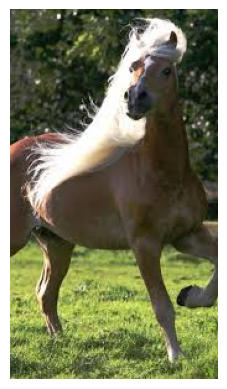

In [46]:
# 이미지 출력
plt.imshow(mpimg.imread(test_image))
plt.axis('off')
plt.show()

In [47]:
# 이미지 불러와 데이터로 변환하기
img = keras.utils.load_img(test_image, target_size=(300,300))
x = keras.utils.img_to_array(img)
print(x.shape)
x = np.expand_dims(x,axis=0)
print(x.shape)

(300, 300, 3)
(1, 300, 300, 3)


In [48]:
classes = model.predict(x)

1/1 [==============================] - 0s 19ms/step


In [49]:
if classes[0][0] > 0.5:
  print("사람")
else:
  print("말")
print(classes[0][0])

말
0.0
